In [45]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

plt.rcParams["font.family"] = "Helvetica"

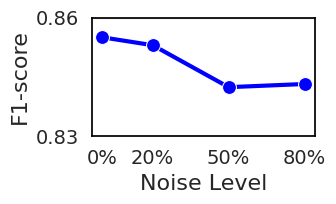

In [44]:
# Data
noise_results = {
    0: 0.855,
    0.2: 0.853,
    0.5: 0.8424,
    0.8: 0.8432
}

# Convert x-axis values to labels
x_labels = ["0%", "20%", "50%", "80%"]
x_values = list(noise_results.keys())
y_values = list(noise_results.values())

# Seaborn style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(3.5, 2.2))  # Set figure size
ax = sns.lineplot(
    x=x_values, 
    y=y_values, 
    marker='o', 
    color='blue', 
    linewidth=3, 
    markersize=10
)

# Set x-axis tick labels
plt.xticks(ticks=x_values, labels=x_labels, fontsize=14)

# Set y-axis limits
plt.ylim(0.83, 0.86)

# Set custom y-ticks (only 0.8 and 0.9)
plt.yticks([0.83, 0.86], labels=["0.83", "0.86"], fontsize=14)

# Labels and title with bigger font size
plt.xlabel("Noise Level", fontsize=16)
plt.ylabel("F1-score", fontsize=16)

# Remove vertical grid lines while keeping horizontal grid lines
plt.grid(axis='x', linestyle="")

# Make outer borders black
ax.spines["top"].set_color("black")
ax.spines["right"].set_color("black")
ax.spines["left"].set_color("black")
ax.spines["bottom"].set_color("black")

# Show the plot
out = os.path.join("sensys_pdfs", "noise_sensitivity.pdf")
os.makedirs(os.path.dirname(out), exist_ok=True)
plt.savefig(out, bbox_inches='tight')
plt.tight_layout()
plt.show()

In [ ]:
0.438	0.4268	0.424	0.4756

def plot_baseline_vs_architecture2(df_pair, palette="coolwarm", 
                                  use_hatches=True, hatch1="//", hatch2="++",
                                  size=(36,8), save=None, plot_legend=True):
    df = df_pair[0]
    stds = df_pair[1]
    shots = [10]
    datasets = df["dataset"].unique().tolist()
    methods = ["SimCLR (linear eval.)", "SimCLR (end-to-end)",
               "Set-SimCLR (linear eval.)", "Set-SimCLR (end-to-end)",
               "DARLING (linear eval.)", "DARLING (end-to-end)",
               "Adapt$^2$ (ours)"]
    
    fig, ax = plt.subplots(figsize=(36, 7))
    width = 0.2  # Width of each bar
    x = np.arange(len(datasets))*7.6
    print(x)
    
    colors = {
        "SimCLR (linear eval.)": "#003f5c",
        "SimCLR (end-to-end)": "#58508d",
        "Set-SimCLR (linear eval.)": "#9a031e",
        "Set-SimCLR (end-to-end)": "#e36414",
        "DARLING (linear eval.)": "#06d6a0",
        "DARLING (end-to-end)": "#118ab2",
        "Adapt$^2$ (ours)": "#ff6361"
    }
    
    legend_handles = []  # Custom legend handles
    legend_labels = []   # Custom legend labels
    
    xtick_locs = []
    for i, dataset in enumerate(datasets):
        for j, shot in enumerate(shots):
            for method in methods:
                df_subset = df[(df["dataset"] == dataset) & (df["shot"] == shot) & (df["method"] == method)]
                std_subset = stds[(stds["dataset"] == dataset) & (stds["shot"] == shot) & (stds["method"] == method)]
                bars = ax.bar(x[i] + width * ((j - 1)*9 + methods.index(method)),
                              df_subset["accuracy"], width, label=f"Method: {method}",
                              color=colors[method], yerr=std_subset["accuracy"])
                
                if i == 0 and j == 0:
                    legend_handles.append(Patch(color=colors[method], label=method))
                    legend_labels.append(method)
            xtick_locs.append(x[i] + width * ((j - 1)*9+3.5))
    
    # ax.set_xlabel("Model")
    ax.set_ylabel("F1-score", fontsize=36)
    # ax.set_title("Comparison of Models")
    ax.set_xticks(xtick_locs)
    ax.set_xticklabels(["1shot", "2shot", "5shot", "10shot"] * 4)
    ax.tick_params(axis='x', labelsize=30)
    ax.tick_params(axis='y', labelsize=30)
    if plot_legend:
        ax.legend(handles=legend_handles, labels=legend_labels, loc='best', ncols=3, fontsize=20)
    
    if save != None:
        plt.savefig(save, bbox_inches='tight')
    
    plt.tight_layout()
    plt.show()


plot_baseline_vs_architecture2(baseline_data, palette= palette,
                              use_hatches=use_hatches, hatch1=hatch1, hatch2=hatch2,
                              size=(30, 6), save='./pdfs/eval_baseline_shots.pdf')

In [ ]:
opportunity_data = {
    "SimCLR (linear eval.)": 0.4268,
    "SimCLR (end-to-end)":  0.458,
    "Set-SimCLR (linear eval.)": 0.438,
    "Set-SimCLR (end-to-end)": 0.446,
    "DARLING (linear eval.)": 0.424,
    "DARLING (end-to-end)": 0.456,
    "Adapt$^2$ (ours)": 0.4756,
}

ninapro_data = {
    "SimCLR (linear eval.)": 0.6763333333,
    "SimCLR (end-to-end)": 0.693,
    "Set-SimCLR (linear eval.)": 0.2063333333,
    "Set-SimCLR (end-to-end)": 0.2866666667,
    "DARLING (linear eval.)": 0.6566666667,
    "DARLING (end-to-end)": 0.6856666667,
    "Adapt$^2$ (ours)": 0.724,
}

fig, ax = plt.subplots(figsize=(36, 7))
width = 0.2  # Width of each bar
x = np.arange(len(datasets))*7.6

colors = {
    "SimCLR (linear eval.)": "#003f5c",
    "SimCLR (end-to-end)": "#58508d",
    "Set-SimCLR (linear eval.)": "#9a031e",
    "Set-SimCLR (end-to-end)": "#e36414",
    "DARLING (linear eval.)": "#06d6a0",
    "DARLING (end-to-end)": "#118ab2",
    "Adapt$^2$ (ours)": "#ff6361"
}

legend_handles = []  # Custom legend handles
legend_labels = []   # Custom legend labels
    
xtick_locs = []
for i, dataset in enumerate(datasets):
    for method in methods:
        bars = ax.bar(x[i] + width * ((j - 1)*9 + methods.index(method)),
                        df_subset["accuracy"], width, label=f"Method: {method}",
                        color=colors[method], yerr=std_subset["accuracy"])
        
        if i == 0 and j == 0:
            legend_handles.append(Patch(color=colors[method], label=method))
            legend_labels.append(method)
    xtick_locs.append(x[i] + width * ((j - 1)*9+3.5))
    
    # ax.set_xlabel("Model")
    ax.set_ylabel("F1-score", fontsize=36)
    # ax.set_title("Comparison of Models")
    ax.set_xticks(xtick_locs)
    ax.set_xticklabels(["1shot", "2shot", "5shot", "10shot"] * 4)
    ax.tick_params(axis='x', labelsize=30)
    ax.tick_params(axis='y', labelsize=30)
    if plot_legend:
        ax.legend(handles=legend_handles, labels=legend_labels, loc='best', ncols=3, fontsize=20)
    
    if save != None:
        plt.savefig(save, bbox_inches='tight')
    
    plt.tight_layout()
    plt.show()


plot_baseline_vs_architecture2(baseline_data, palette= palette,
                              use_hatches=use_hatches, hatch1=hatch1, hatch2=hatch2,
                              size=(30, 6), save='./pdfs/eval_baseline_shots.pdf')